In [1]:
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import tensorflow.keras as kr
import tensorflow as tf

In [3]:
data = pd.read_csv("data/Set1.csv")

In [8]:
XTrain = np.array(data[['PhiNorm','ThetaNorm']])
# Target
YTrain = np.array(data.Tipo)
YTrain = YTrain[:,np.newaxis]

print(XTrain.shape, YTrain.shape)

((100, 2), (100, 1))


In [9]:
NN = [2,3,8,4,1]
lr = 0.02

In [10]:
# Estructura del Modelo
model = kr.Sequential()

In [12]:
# Capa 1
model.add(kr.layers.Dense(NN[1],activation='relu'))
# Capa 2 
model.add(kr.layers.Dense(NN[2],activation='relu'))
# Capa 3 
model.add(kr.layers.Dense(NN[3],activation='relu'))
# Capa 4 
model.add(kr.layers.Dense(NN[4],activation='sigmoid'))

In [13]:
# Compilar el Modelo
model.compile(loss='mse',optimizer=kr.optimizers.SGD(lr=lr),metrics=['acc'])

In [14]:
# Entrenamiento

In [15]:
def Train(epochs):
    
    history = model.fit(XTrain,YTrain,epochs=epochs,batch_size=XTrain.shape[0],verbose=0)
    
    return history

In [26]:
for i in range(10):
    history = Train(500)
    loss = history.history['loss'][-1]
    print(i,'--- Entrenando Red --- loss:', loss)
    if loss < 0.02:
        print('Red Entrenada')
        break

(0, '--- Entrenando Red --- loss:', 0.044216737151145935)
(1, '--- Entrenando Red --- loss:', 0.043160438537597656)
(2, '--- Entrenando Red --- loss:', 0.04283580929040909)
(3, '--- Entrenando Red --- loss:', 0.04210059344768524)
(4, '--- Entrenando Red --- loss:', 0.041768208146095276)
(5, '--- Entrenando Red --- loss:', 0.04145641252398491)
(6, '--- Entrenando Red --- loss:', 0.04125445336103439)
(7, '--- Entrenando Red --- loss:', 0.04103784263134003)
(8, '--- Entrenando Red --- loss:', 0.040912214666604996)
(9, '--- Entrenando Red --- loss:', 0.04071266949176788)


In [30]:
capas = model.layers[0]
w,b = capas.get_weights()

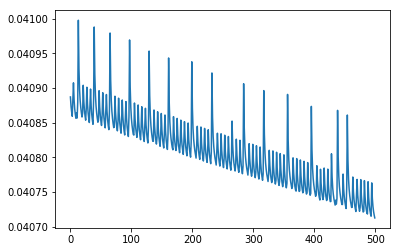

In [31]:
plt.plot(history.history['loss'])

In [32]:
# Guardar el modelo
model.save('Models/KerasModel1')